#here we will learn to manually construct multi-head attention mechanism


In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F


In [2]:
#we will try for sentence "my name is saugat thapa"
seq_len=4            #it is the sequence length of input
batch_size=1
input_dim=512  #it is the input dimension for attention layer
d_model=512    #d_model is output dimension of attention layer

In [3]:
#now lets define a random tensor for now
x=torch.randn((batch_size,seq_len,input_dim))
x

tensor([[[ 0.7212, -0.0142,  0.6118,  ..., -0.3112,  0.9203,  0.2959],
         [ 1.1786, -0.6677, -0.0272,  ...,  1.4543,  1.3518,  0.5673],
         [ 0.9175,  0.2883,  1.6722,  ...,  0.0447,  2.0479, -1.5610],
         [ 1.5324, -0.0286,  0.9118,  ...,  1.9278,  0.6801,  0.7101]]])

In [4]:
x.shape

torch.Size([1, 4, 512])

#now , for each word has to have a seperate q,k and v layer

In [5]:
qkv_layer=nn.Linear(input_dim,3*d_model)
qkv_layer

Linear(in_features=512, out_features=1536, bias=True)

In [6]:
qkv=qkv_layer(x)
qkv

tensor([[[ 0.2406,  0.2070, -0.3991,  ..., -0.3147, -0.3860,  0.0812],
         [-0.6124,  0.4178,  0.4701,  ..., -0.7358, -1.1516,  0.6021],
         [-0.9050,  0.3097, -1.3377,  ...,  0.4068,  0.0830,  0.0061],
         [-0.6106,  0.1591, -0.1440,  ...,  0.2588, -0.4249, -0.7088]]],
       grad_fn=<ViewBackward0>)

In [7]:
qkv.shape

torch.Size([1, 4, 1536])

#now its time to break qkv into q, k and v. for this we first need to define the number of heads as well

In [8]:
num_head=8
head_dim=d_model//num_head
head_dim

64

In [9]:
qkv=qkv.reshape(batch_size,seq_len,num_head,3*head_dim)
qkv

tensor([[[[ 2.4063e-01,  2.0696e-01, -3.9914e-01,  ..., -1.1075e-01,
            1.3017e-03, -6.1001e-01],
          [ 2.4737e-01, -6.6784e-01, -1.6286e-01,  ...,  6.8161e-01,
           -3.1803e-01,  2.4654e-01],
          [-6.5161e-01, -1.8098e-01, -9.7366e-01,  ...,  6.1118e-01,
           -9.2225e-01, -6.0308e-02],
          ...,
          [ 4.5464e-01,  3.3616e-01,  1.4387e-01,  ...,  1.3679e+00,
           -9.6658e-01,  3.6016e-01],
          [ 8.2309e-01,  1.5208e+00, -1.3530e-01,  ..., -9.8529e-01,
           -8.5720e-01, -1.6757e-01],
          [ 3.6328e-01, -4.3468e-01,  5.5090e-01,  ..., -3.1467e-01,
           -3.8600e-01,  8.1195e-02]],

         [[-6.1240e-01,  4.1776e-01,  4.7006e-01,  ...,  2.8078e-01,
           -2.4050e-01, -2.4242e-02],
          [-7.1398e-01, -4.9218e-01, -6.5523e-01,  ...,  7.5884e-02,
            1.9267e-01, -1.1549e+00],
          [-6.3247e-01,  1.6318e-01, -2.1625e+00,  ...,  1.8444e+00,
           -8.4474e-01, -3.4760e-01],
          ...,
     

In [10]:
qkv.shape

torch.Size([1, 4, 8, 192])

now , just for easier purposes, lets change the position of head and seq length so that it becomes easier for language translation later

In [11]:
qkv=qkv.permute(0,2,1,3)
qkv.shape

torch.Size([1, 8, 4, 192])

In [12]:
q,k,v=qkv.chunk(3,dim=-1) #(2,dim=-1) means 192/3=64 each

In [13]:
q,k,v

(tensor([[[[ 0.2406,  0.2070, -0.3991,  ..., -0.5780, -0.3726, -0.4981],
           [-0.6124,  0.4178,  0.4701,  ...,  0.0416,  0.1303, -1.2610],
           [-0.9050,  0.3097, -1.3377,  ...,  0.4112,  0.3365,  0.4393],
           [-0.6106,  0.1591, -0.1440,  ...,  0.7123, -0.6369, -0.4240]],
 
          [[ 0.2474, -0.6678, -0.1629,  ...,  0.5126, -1.3661, -0.9694],
           [-0.7140, -0.4922, -0.6552,  ..., -0.1578, -0.5739, -0.4801],
           [-0.1036,  0.2489, -0.4715,  ..., -1.3450,  0.3991,  0.1433],
           [ 0.3709, -0.1088, -0.2597,  ...,  0.3463,  0.1919,  0.6347]],
 
          [[-0.6516, -0.1810, -0.9737,  ..., -0.3461, -0.7106, -0.8943],
           [-0.6325,  0.1632, -2.1625,  ...,  0.1436,  0.2483,  0.1061],
           [-1.0222,  0.7544,  0.2537,  ...,  0.7643,  0.7101, -0.4133],
           [-0.3370,  0.3394, -0.1682,  ..., -0.5278,  0.9090,  0.7087]],
 
          ...,
 
          [[ 0.4546,  0.3362,  0.1439,  ..., -0.7314,  0.7460, -0.6375],
           [-0.7165, -0.5

In [14]:
q.shape,k.shape,v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

#now the other process is similar to self attention layer
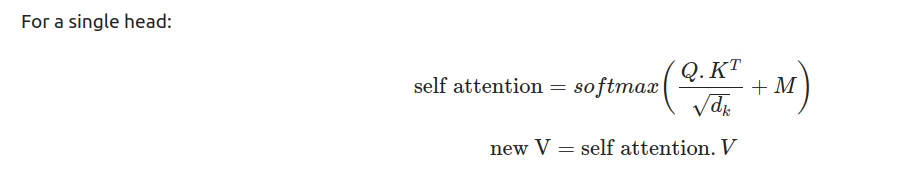

In [15]:
d_k=q.shape[-1]
d_k
#d_k= size of input vector here our vector size is 64

64

In [16]:
import math
scaled=torch.matmul(q,k.transpose(-2,-1))/math.sqrt(d_k)
scaled.shape
#note: if you are confused , then please first check the self attention ipynb file, there all these things are well explained

torch.Size([1, 8, 4, 4])

In [17]:
#note:
#transpose order doesnt matter . see the example below
y=torch.randn(2,3)
y

tensor([[-1.4485, -0.4559, -0.4585],
        [-1.6612, -1.1167,  0.3556]])

In [18]:
a=torch.transpose(y,0,1)
a

tensor([[-1.4485, -1.6612],
        [-0.4559, -1.1167],
        [-0.4585,  0.3556]])

In [19]:
b=torch.transpose(y,1,0)
b

tensor([[-1.4485, -1.6612],
        [-0.4559, -1.1167],
        [-0.4585,  0.3556]])

In [20]:
a==b

tensor([[True, True],
        [True, True],
        [True, True]])

#masking


In [22]:
mask=torch.full(scaled.shape,float('-inf'))

mask=torch.triu(mask,diagonal=1)
mask[0][1]

tensor([[0., -inf, -inf, -inf],
        [0., 0., -inf, -inf],
        [0., 0., 0., -inf],
        [0., 0., 0., 0.]])

In [24]:
mask.shape

torch.Size([1, 8, 4, 4])

In [25]:
scaled=scaled+mask

In [27]:
scaled[0][1]

tensor([[ 0.5396,    -inf,    -inf,    -inf],
        [ 0.1383, -0.0305,    -inf,    -inf],
        [ 0.1577,  0.1625,  0.2831,    -inf],
        [-0.2962, -0.3705,  0.4369, -0.3036]], grad_fn=<SelectBackward0>)

In [28]:
scaled.shape

torch.Size([1, 8, 4, 4])

#attention mechanism


In [29]:
attention=F.softmax(scaled,dim=-1)  #here dim=-1 means 4 ie each row is applied with attention mechanism
attention

tensor([[[[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4391, 0.5609, 0.0000, 0.0000],
          [0.2126, 0.4198, 0.3676, 0.0000],
          [0.1799, 0.3101, 0.2566, 0.2534]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.5421, 0.4579, 0.0000, 0.0000],
          [0.3186, 0.3202, 0.3612, 0.0000],
          [0.1999, 0.1856, 0.4161, 0.1984]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.3355, 0.6645, 0.0000, 0.0000],
          [0.3174, 0.2916, 0.3910, 0.0000],
          [0.2774, 0.2628, 0.2586, 0.2012]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4076, 0.5924, 0.0000, 0.0000],
          [0.3941, 0.3066, 0.2993, 0.0000],
          [0.2044, 0.2735, 0.3336, 0.1885]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.6795, 0.3205, 0.0000, 0.0000],
          [0.1642, 0.3485, 0.4873, 0.0000],
          [0.3006, 0.2015, 0.1932, 0.3047]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.6295, 0.3705, 0.0000, 0.0000],
          [0.3286, 0.2

In [30]:
attention.shape

torch.Size([1, 8, 4, 4])

In [31]:
value=torch.matmul(attention,v)
value.shape

torch.Size([1, 8, 4, 64])

#functionizing everything we have learned so far

In [32]:
import math
def scaled_dot_product(q,k,v, mask=None):
  d_k=q.shape[-1]
  scaled=torch.matmul(q,k.transpose(-1,-2)/math.sqrt(d_k))
  if mask is not None:
    scaled+=mask
  attention=F.softmax(scaled,dim=-1)
  value=torch.matmul(attention,v)
  return value, attention

In [33]:

values, attention = scaled_dot_product(q, k, v, mask=mask)


In [34]:
attention

tensor([[[[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4391, 0.5609, 0.0000, 0.0000],
          [0.2126, 0.4198, 0.3676, 0.0000],
          [0.1799, 0.3101, 0.2566, 0.2534]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.5421, 0.4579, 0.0000, 0.0000],
          [0.3186, 0.3202, 0.3612, 0.0000],
          [0.1999, 0.1856, 0.4161, 0.1984]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.3355, 0.6645, 0.0000, 0.0000],
          [0.3174, 0.2916, 0.3910, 0.0000],
          [0.2774, 0.2628, 0.2586, 0.2012]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4076, 0.5924, 0.0000, 0.0000],
          [0.3941, 0.3066, 0.2993, 0.0000],
          [0.2044, 0.2735, 0.3336, 0.1885]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.6795, 0.3205, 0.0000, 0.0000],
          [0.1642, 0.3485, 0.4873, 0.0000],
          [0.3006, 0.2015, 0.1932, 0.3047]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.6295, 0.3705, 0.0000, 0.0000],
          [0.3286, 0.2

In [35]:
attention.shape


torch.Size([1, 8, 4, 4])

In [37]:
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4391, 0.5609, 0.0000, 0.0000],
        [0.2126, 0.4198, 0.3676, 0.0000],
        [0.1799, 0.3101, 0.2566, 0.2534]], grad_fn=<SelectBackward0>)

In [38]:
value

tensor([[[[-4.3141e-01, -4.1505e-01, -9.4098e-01,  ..., -1.1075e-01,
            1.3017e-03, -6.1001e-01],
          [-4.3754e-01,  1.9716e-02, -4.4485e-01,  ...,  1.0887e-01,
           -1.3433e-01, -2.8144e-01],
          [-3.2434e-01,  2.4725e-01, -4.6113e-01,  ..., -1.0068e-01,
           -1.6783e-01, -3.9119e-01],
          [ 3.4330e-02,  1.9010e-01, -4.3377e-01,  ...,  5.8598e-02,
            1.6510e-01, -2.8063e-01]],

         [[-4.4184e-01, -7.7996e-02,  6.8422e-01,  ...,  6.8161e-01,
           -3.1803e-01,  2.4654e-01],
          [-6.7130e-02, -5.2053e-01, -1.2937e-01,  ...,  4.0425e-01,
           -8.4186e-02, -3.9518e-01],
          [ 1.8486e-01, -4.3427e-01,  1.8905e-01,  ..., -1.8877e-02,
            2.0280e-01, -4.6252e-01],
          [ 2.2001e-01, -3.1906e-01,  4.3716e-01,  ..., -2.4959e-01,
            3.2960e-01, -3.0210e-01]],

         [[ 2.6102e-01, -2.3570e-01,  2.6026e-01,  ...,  6.1118e-01,
           -9.2225e-01, -6.0308e-02],
          [-3.2549e-01, -1.9611e-

In [39]:
value.shape

torch.Size([1, 8, 4, 64])

#now its time to combine and concatinate all the head . ie combine and concatinate everything

In [48]:
value=value.reshape(batch_size,seq_len,num_head*head_dim)
value.shape

torch.Size([1, 4, 512])

In [44]:
linear_layer=nn.Linear(d_model,d_model)

In [45]:
output=linear_layer(value)

In [46]:
output.shape

torch.Size([1, 4, 512])

In [47]:
output

tensor([[[ 0.0763,  0.0563, -0.2609,  ..., -0.2381, -0.1230, -0.0328],
         [-0.1078,  0.1675,  0.0630,  ...,  0.2357,  0.2193,  0.3515],
         [-0.0946,  0.2540, -0.4949,  ...,  0.2124,  0.3063, -0.2068],
         [ 0.1889,  0.2858,  0.1263,  ...,  0.5163,  0.3218, -0.4964]]],
       grad_fn=<ViewBackward0>)

#now lets redo all the above stuff but with class and function

In [56]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import math
def scaled_dot_product(q,k,v, mask=None):
  d_k=q.shape[-1]
  scaled=torch.matmul(q,k.transpose(-1,-2)/math.sqrt(d_k))
  if mask is not None:
    scaled+=mask
  attention=F.softmax(scaled,dim=-1)
  value=torch.matmul(attention,v)
  return value, attention

class multi_head_attention(nn.Module):
  def __init__(self,input_dim,d_model,num_head):
    super().__init__()
    self.input_dim=input_dim
    self.d_model=d_model
    self.num_head=num_head
    self.head_dim=d_model//num_head
    self.qkv_layer=nn.Linear(input_dim,3*d_model)
    self.linear_layer=nn.Linear(d_model,d_model)


  def forward(self,x,mask=None):
    batch_size,seq_len,input_dim=x.shape
    print(f"x.size(): {x.size()}")
    qkv=self.qkv_layer(x)

    #reshaping
    qkv=qkv.reshape(batch_size,seq_len,self.num_head,3*self.head_dim)
    print(f"qkv.size(): {qkv.size()}")
    qkv=qkv.permute(0,2,1,3)
    print(f"changed_qkv.size(): {qkv.size()}")

    q,k,v=qkv.chunk(3,dim=-1)
    print(f"q.size(): {q.size()}")
    print(f"k.size(): {k.size()}")
    print(f"v.size(): {v.size()}")


    #now lets use the scaled_dot_product
    value, attention=scaled_dot_product(q,k,v,mask)
    print(f"value.size(): {value.size()}")
    print(f"attention.size(): {attention.size()}")

    value=value.reshape(batch_size,seq_len,num_head*head_dim)
    print(f"value.size(): {value.size()}")

    output=linear_layer(value)
    print(f"output.size(): {output.size()}")

    return output










#input

In [58]:
input_dim = 1024
d_model = 512
num_heads = 8


batch_size=30
seq_len=4
x=torch.randn((batch_size,seq_len,input_dim))

model=multi_head_attention(input_dim,d_model,num_heads)
output=model.forward(x)
output

x.size(): torch.Size([30, 4, 1024])
qkv.size(): torch.Size([30, 4, 8, 192])
changed_qkv.size(): torch.Size([30, 8, 4, 192])
q.size(): torch.Size([30, 8, 4, 64])
k.size(): torch.Size([30, 8, 4, 64])
v.size(): torch.Size([30, 8, 4, 64])
value.size(): torch.Size([30, 8, 4, 64])
attention.size(): torch.Size([30, 8, 4, 4])
value.size(): torch.Size([30, 4, 512])
output.size(): torch.Size([30, 4, 512])


tensor([[[ 0.0612,  0.0941,  0.1246,  ...,  0.2824,  0.1089,  0.1765],
         [ 0.4583, -0.2270,  0.0458,  ...,  0.1541,  0.0425, -0.1707],
         [ 0.0575, -0.0683,  0.0274,  ..., -0.1395, -0.1700,  0.1491],
         [-0.0283, -0.1128,  0.2810,  ..., -0.0737, -0.0854, -0.2499]],

        [[-0.0535, -0.1647,  0.1244,  ...,  0.2055,  0.3547,  0.1870],
         [ 0.0160,  0.0115, -0.1131,  ..., -0.5118, -0.4362, -0.1604],
         [ 0.0888, -0.0208,  0.2252,  ..., -0.0776,  0.0954, -0.1329],
         [-0.0608, -0.2941,  0.0686,  ..., -0.1497, -0.1644, -0.1684]],

        [[ 0.0278, -0.0259,  0.3064,  ..., -0.1668, -0.1792,  0.0327],
         [ 0.3543, -0.1377, -0.0829,  ...,  0.1527,  0.1891,  0.3151],
         [-0.1464,  0.1110, -0.1059,  ...,  0.1391,  0.2016, -0.2284],
         [-0.1448, -0.0581, -0.1199,  ..., -0.2126, -0.0143, -0.1857]],

        ...,

        [[-0.2626, -0.3326,  0.1676,  ..., -0.1305, -0.0812,  0.2492],
         [-0.1444, -0.2621, -0.1091,  ..., -0.1266,  0.03